# Step 1: Installation and Setup

In [ ]:
# Installing TensorFlow
! pip install -q tensorflow-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 23.1.4 which is incompatible.
tensorflow 2.9.2 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.11.0 which is incompatible.
tensorflow 2.9.2 requires tensorboard<2.10,>=2.9, but you have tensorboard 2.11.0 which is incompatible.
tensorflow 2.9.2 requires tensorflow-estimator<2.10.0,>=2.9.0rc0, but you have tensorflow-estimator 2.11.0 which is incompatible.


In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.11.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing the dataset from kaggle to google colab

In [ ]:
# install kaggle API
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# create a directory as kaggle
! mkdir -p ~/.kaggle

In [ ]:
# import kaggle API
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle

In [ ]:
# disable the API key
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# list of datasets
! kaggle datasets list

ref                                                           title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                     COVID-19 Dataset                                     5MB  2022-11-13 15:47:17          15902        447  1.0              
devrimtuner/list-of-moststreamed-songs-on-spotify             Top 100 Spotify Songs👑🎤🎧🎼                            3KB  2022-12-30 05:42:54            663         40  1.0              
thedevastator/analyzing-credit-card-spending-habits-in-india  Credit Card Spending Habits in India               319KB  2022-12-14 07:30:37           1959         63  1.0              
die9origephit/fifa-world-cup-2022-complete-dataset            Fifa World Cu

In [ ]:
# import the dataset
! kaggle datasets download -d mlg-ulb/creditcardfraud

 97% 64.0M/66.0M [00:02<00:00, 32.6MB/s]
100% 66.0M/66.0M [00:02<00:00, 23.6MB/s]


In [ ]:
# unzipping dataset
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
dataset_1  = pd.read_csv('/content/creditcard.csv')

In [ ]:
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Step 3: Data Preprocessing

In [ ]:
dataset_1.shape

(284807, 31)

In [ ]:
# checking the null values
dataset_1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# observations in each class
dataset_1['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#data is unbalanced as class 0 values >> class 1 values.
# balance the dataset
#1- fraud 0-non-fraud
fraud = dataset_1[dataset_1['Class']==1]
non_fraud = dataset_1[dataset_1['Class']==0]

In [ ]:
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

In [ ]:
# random selection of samples
non_fraud_t = non_fraud.sample(n=492)

In [ ]:
non_fraud_t.shape

(492, 31)

In [ ]:
# merge dataset
dataset = fraud.append(non_fraud_t, ignore_index=True)

In [ ]:
print(dataset)

         Time        V1        V2        V3        V4        V5        V6  \
0       406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1       472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2      4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3      6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4      7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
..        ...       ...       ...       ...       ...       ...       ...   
979  163799.0  0.213869 -0.315857 -0.350156 -3.108235  0.042065 -0.916317   
980  146448.0  1.730323 -0.315923 -1.876880  0.367842  0.310781 -0.461919   
981  145013.0 -0.599484  1.052578 -0.293826  1.143493  0.828026 -1.047115   
982  152375.0 -1.005364  1.536839 -1.429702 -0.688998  0.459726 -0.482108   
983  138989.0 -1.137495  0.850832  0.288451 -1.681578  2.058796 -0.528646   

           V7        V8        V9  ...       V21       V22       V23  \
0  

In [ ]:
# observations in each class
dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
# matrix of features(independent variables)
x = dataset.drop(labels=['Class'], axis=1)

In [ ]:
# dependent variable
y = dataset['Class']

In [ ]:
x.shape, y.shape

((984, 30), (984,))

In [ ]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)#fit and transform
x_test = sc.transform(x_test)#transform

In [ ]:
x_train

array([[-0.71333118,  0.14316994, -0.3903184 , ...,  0.43801853,
         0.77003911, -0.22442563],
       [-0.86010884,  0.50629666, -0.09491244, ...,  0.45701571,
         0.63826477, -0.43966751],
       [-0.89610823,  0.1861942 ,  0.10126103, ...,  0.29790017,
         0.48033025, -0.43861841],
       ...,
       [ 1.3437071 ,  0.43638272, -0.83441532, ..., -0.31659348,
        -0.74549971, -0.40801944],
       [-0.15280407,  0.07871278, -0.3164791 , ..., -0.25074527,
        -0.18810777, -0.39411876],
       [ 1.63740447,  0.85494845, -0.72186326, ..., -0.18971517,
        -0.26638221, -0.39053431]])

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [ ]:
# reshape the dataset
x_train = x_train.reshape(787, 30, 1)
x_test = x_test.reshape(197, 30, 1)

In [ ]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

# Step 4: Building the model

In [ ]:
# defining an object
model = tf.keras.models.Sequential()

In [ ]:
# first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape = (30, 1)))
#filters=32,kernel or filter size = 2x2,same padding-here we don't lose any info as a column
#of zeros is added here.In valid padding we lose the info.
#activation function brings non-linearity into network.
# batch normalization - to normalize inouts of each layer.helps in fighting internal
#covariance shift problem.it increases speed,performance and stability of network.
model.add(tf.keras.layers.BatchNormalization())
# maxpool layer - reduces dimensionality of output i.e. helps in reducing size of convolution layer of next layer
#due to no overlapping.next convolution layer's size decreases due to maxpool layer.
model.add(tf.keras.layers.MaxPool1D(pool_size=2))
# dropout layer- to remove overfitting by creating dummy values.
model.add(tf.keras.layers.Dropout(0.2))#ignoring 20% neurons which are randomly selected while training.

In [ ]:
# second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
# flatten layer- converts arry into vectors.
model.add(tf.keras.layers.Flatten())

In [ ]:
# first dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 30, 32)           128       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 15, 64)           2

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Training the model

In [ ]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
25/25 [==============================] - 5s 42ms/step - loss: 0.8290 - accuracy: 0.5997 - val_loss: 0.6523 - val_accuracy: 0.6599
Epoch 2/25
25/25 [==============================] - 0s 17ms/step - loss: 0.6014 - accuracy: 0.7052 - val_loss: 0.6240 - val_accuracy: 0.8173
Epoch 3/25
25/25 [==============================] - 0s 20ms/step - loss: 0.5069 - accuracy: 0.7751 - val_loss: 0.5979 - val_accuracy: 0.8629
Epoch 4/25
25/25 [==============================] - 0s 18ms/step - loss: 0.4570 - accuracy: 0.8158 - val_loss: 0.5669 - val_accuracy: 0.8782
Epoch 5/25
25/25 [==============================] - 1s 21ms/step - loss: 0.4060 - accuracy: 0.8335 - val_loss: 0.5312 - val_accuracy: 0.8985
Epoch 6/25
25/25 [==============================] - 0s 17ms/step - loss: 0.3386 - accuracy: 0.8666 - val_loss: 0.4949 - val_accuracy: 0.9086
Epoch 7/25
25/25 [==============================] - 0s 19ms/step - loss: 0.3621 - accuracy: 0.8653 - val_loss: 0.4579 - val_accuracy: 0.9086
Epoch 8/25
25

In [60]:
# model predictions
#y_pred = model.predict_classes(x_test)
#y_pred = np.argmax(model.predict(x_test), axis=-1)
predictions = np.argmax(model.predict(x_test),axis=1)

7/7 [==============================] - 0s 3ms/step


In [78]:
print(y_pred[5]), print(y_test[5])

[0.9992698]
1


(None, None)

In [64]:
model.evaluate(x_test,y_test) #1st value is loss and 2nd value is accuracy.

7/7 [==============================] - 0s 5ms/step - loss: 0.1433 - accuracy: 0.9492


[0.14328323304653168, 0.9492385983467102]

In [72]:
x_new=x_test[:6] #taking 5 values with indices 0,1,2,3,4,5. 

In [73]:
y_pred=model.predict(x_new)

1/1 [==============================] - 0s 23ms/step


In [74]:
y_pred

array([[0.12125588],
       [0.02788537],
       [0.9996933 ],
       [0.03092721],
       [0.03864055],
       [0.9992698 ]], dtype=float32)

In [75]:
y_test[:6]

array([1, 0, 1, 0, 0, 1])

In [76]:
y_pred.round(0)

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

# Step 6: Learning Curve

In [81]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

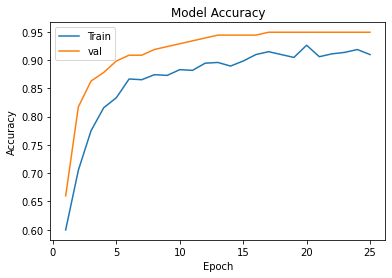

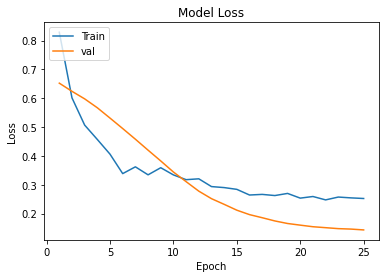

In [82]:
learning_curve(history, 25)